# Assignment on Titanic survivars dataset 

         
        

FARAZ SHABBIR SHAIKH


farazsasahaikh@gmail.com


 9482233790

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [19]:
df=pd.read_csv("titanic.csv")

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# DATA CLEANING

First step in data analysis is data cleaning. From the above dataframe we can see that there are columns that are repeated and are unnecessary. So we can drop column "who" which is similar to "sex" column, alive column can also be dropped as there is survived column, class column is same as pclass column so it can also be dropped and embarked is redundant column of embark_town  

In [21]:
df.drop(columns=['embarked','class','who','alive'],inplace=True)

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,NaN,Southampton,True


In [23]:
df.shape

(891, 11)

# Next step is to remove null values if any.

In [25]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

### Drop duplicate values. 

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
adult_male       0
deck           582
embark_town      2
alone            0
dtype: int64

### As we can see the no of null values has reduced by removing duplicates

In [29]:
df.shape

(784, 11)

### The deck column has a total of  582 null values out of 784rows. So this column will not be useful in our analysis, therefore it is better to drop this column too.

In [30]:
df.drop(columns=['deck'],inplace=True)

In [87]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

### The Age column has 106 NaN values out of 784 values. We need to fill these values so that we can draw some useful information.
### We can fill these NaN values with mean or median of the age column. We can also fill it with previous or next row data.
### lets  fill NaN values by taking mean of age column.

In [32]:
df['age']=df['age'].fillna(df['age'].mean())

In [33]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    2
alone          0
dtype: int64

### Right now we are left with two NaN values in embark_town column. As the number is very less we can drop this data, we will not lose much of essential data.

In [34]:
df.dropna(axis=0,inplace=True)

In [35]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

### As we can see there are no Nan values left.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     782 non-null    int64  
 1   pclass       782 non-null    int64  
 2   sex          782 non-null    object 
 3   age          782 non-null    int64  
 4   sibsp        782 non-null    int64  
 5   parch        782 non-null    int64  
 6   fare         782 non-null    float64
 7   adult_male   782 non-null    bool   
 8   embark_town  782 non-null    object 
 9   alone        782 non-null    bool   
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 76.5+ KB


### Age column is of float type.lets convert to int type.

In [37]:
df['age']=df['age'].astype('int64')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     782 non-null    int64  
 1   pclass       782 non-null    int64  
 2   sex          782 non-null    object 
 3   age          782 non-null    int64  
 4   sibsp        782 non-null    int64  
 5   parch        782 non-null    int64  
 6   fare         782 non-null    float64
 7   adult_male   782 non-null    bool   
 8   embark_town  782 non-null    object 
 9   alone        782 non-null    bool   
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 76.5+ KB


In [90]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22,1,0,7.2500,True,Southampton,False
1,1,1,female,38,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26,0,0,7.9250,False,Southampton,True
3,1,1,female,35,1,0,53.1000,False,Southampton,False
4,0,3,male,35,0,0,8.0500,True,Southampton,True


### Now the data is ready for the analysis

In [91]:
categorical=['survived','pclass','sex','sibsp','parch','adult_male','embark_town','alone']
continous=['age','fare']

### univariate analysis

0    461
1    321
Name: survived, dtype: int64


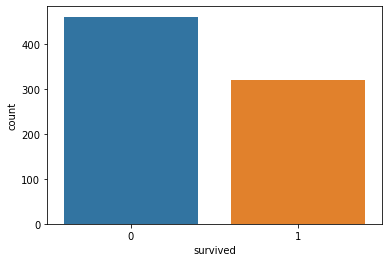

3    405
1    212
2    165
Name: pclass, dtype: int64


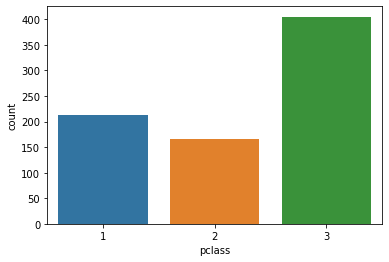

male      491
female    291
Name: sex, dtype: int64


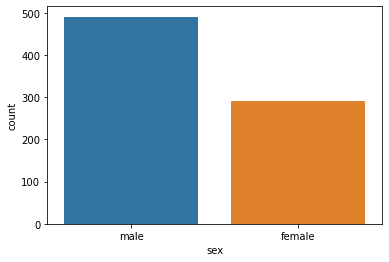

0    515
1    201
2     27
4     18
3     14
5      5
8      2
Name: sibsp, dtype: int64


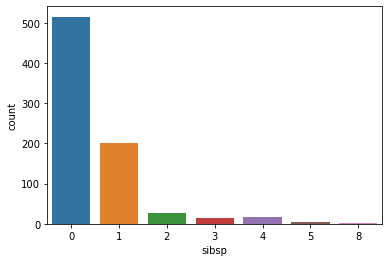

0    578
1    114
2     75
5      5
3      5
4      4
6      1
Name: parch, dtype: int64


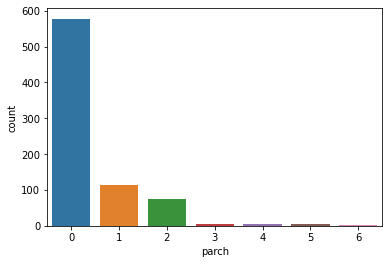

True     451
False    331
Name: adult_male, dtype: int64


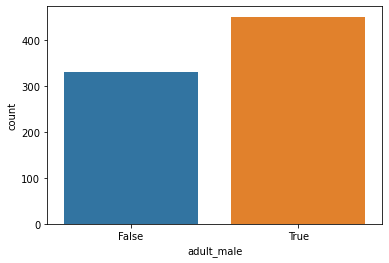

Southampton    568
Cherbourg      155
Queenstown      59
Name: embark_town, dtype: int64


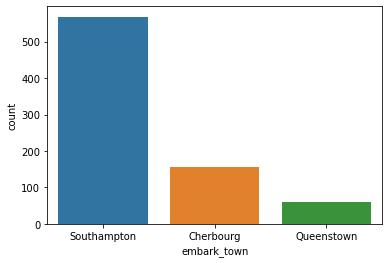

True     444
False    338
Name: alone, dtype: int64


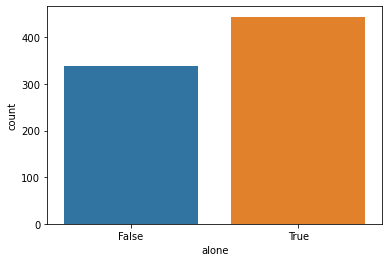

In [107]:
for i in categorical:
    print(df[i].value_counts())
    sb.countplot(x=i,data=df)
    plt.show()

### Graph 1: Out of a total of 782 people, 461 had died and 321 had survived. So it implies that the deaths are more than survivors
### Graph 2: Most of the people i.e more than half of the people where travelling in class 3.212 people were in class 1 and the remaining 165 were in class2.
### Graph 3: The ship had 491 male and 291 female on board. Therefore there were 200 more male than female.
### Graph 4:sibsp is number of siblings and spouse,  515 people where not having siblings and spouse, whereas 267 people had 1 or more siblings and spouse.
### Graph 5:parch is Number of Parents/Children, so there were 578 people without parents and children, 204 people were with their parent/children.
### Graph 6: Out of 491 male, 451 were adult so we can that remaining 40 males were kids.
### Graph 7: 72% of people boarded ship from southampton. Remaining were from cherbourg and queenstown.
### Graph 8:444 people were alone whereas 338 people were with their family.

count    782.000000
mean      29.682864
std       13.700349
min        0.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64
0.4138053299669018


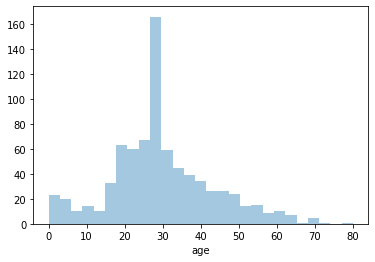

count    782.000000
mean      34.595913
std       52.176458
min        0.000000
25%        8.050000
50%       15.875000
75%       33.375000
max      512.329200
Name: fare, dtype: float64
4.583205969233933


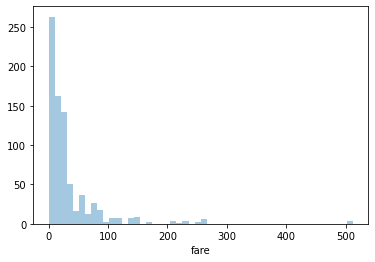

In [108]:
for i in continous:
    print(df[i].describe())
    
    print(df[i].skew())
    sb.distplot(df[i],kde=False)
    plt.show()

### Graph 1: More than 160 people had their age nearing to 30. Also the no of youngsters is more than old age people.
### Graph 2: Almost all the people travelled with fare less than 100.

## Bivariate analysis
### categorical vs categorical.

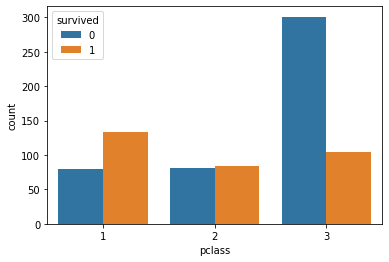

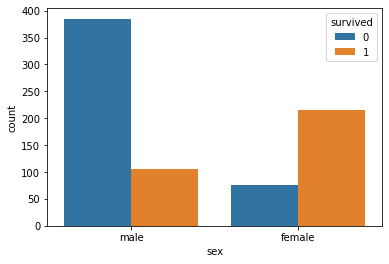

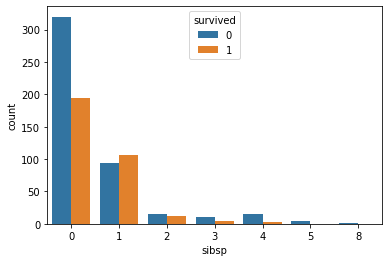

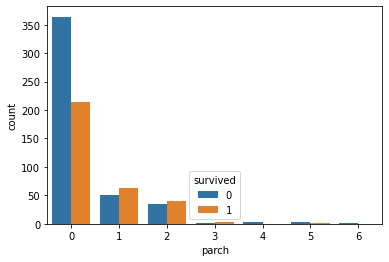

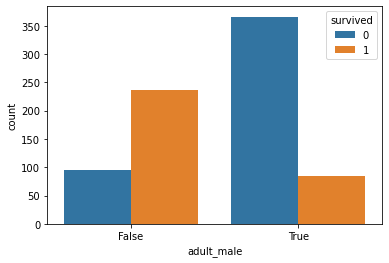

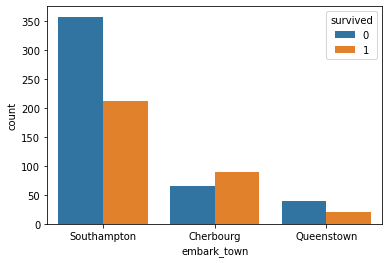

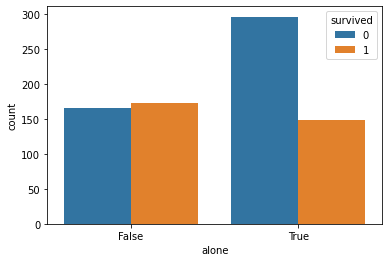

In [109]:
for i in categorical:
    if i!='survived':
        sb.countplot(x=i,hue='survived',data=df)
        plt.show()

### Graph 1: The survival rate of class3 is very less compared to other classes.  class 1 has highest survival rate.
### Graph 2: The survival rate of male is very less compared to female.  
### Graph 3: The survival rate of people travelling without sibling and spouse is lesser than people travelling with sibling and spouse.
### Graph 4: The survival rate of people travelling without their parents and children is lesser than people travelling with parents and children.
### Graph 5: Adult male has lesser chance of survival.
### Graph 6: Cherbourg people have more survival rate than Queenstown and Southampton.
### Graph 7: People who were alone have more deaths.

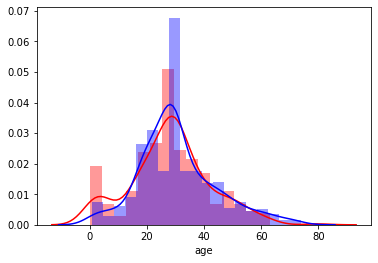

In [110]:
sb.distplot(df['age'][df['survived']==1],color='red')
sb.distplot(df['age'][df['survived']==0],color='blue')
plt.show()

### On this graph we can see both features almost overlap. We cannot drop this feature. Let us now see the relation between gender and age.

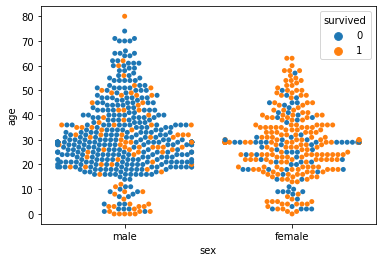

In [106]:
sb.swarmplot(x='sex',y='age',hue='survived',data=df)
plt.show()

### By looking at the  above graph we can conclude that a male aged between 0- 5 have mostly survived whereas in females survival is more for 50+ age.

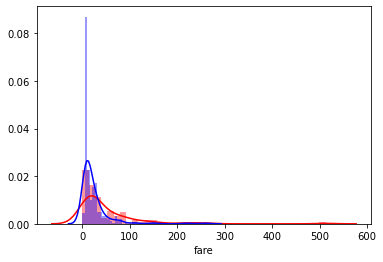

In [111]:
sb.distplot(df['fare'][df['survived']==1],color='red')
sb.distplot(df['fare'][df['survived']==0],color='blue')
plt.show()

### The lesser the fare less is survival

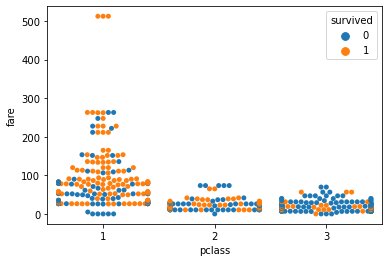

In [112]:
sb.swarmplot(x='pclass',y='fare',hue='survived',data=df)
plt.show()

### The survival rate for people in class 1 who have paid more fare is more

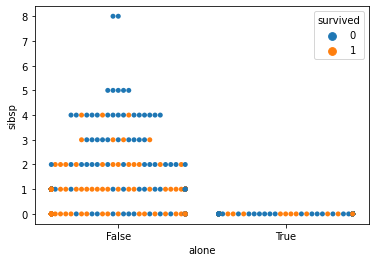

In [113]:
sb.swarmplot(x='alone',y='sibsp',hue='survived',data=df)
plt.show()

### People having more than 2 siblings have mostly died

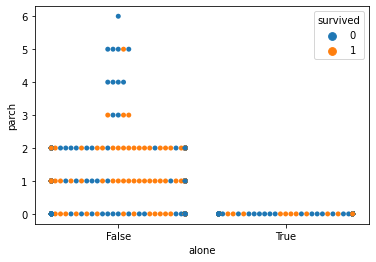

In [114]:
sb.swarmplot(x='alone',y='parch',hue='survived',data=df)
plt.show()

### The people with 1 or 2 parent and children have survived more

### Now that our analysis is complete let's apply machine learning algorithm on our dataset.

In [115]:
from sklearn.preprocessing import LabelEncoder

### Split the DataFrame into dependent and independent attributes.

In [116]:
x=df.drop('survived',axis=1)
y=df['survived']

In [117]:
x.head()

,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,3,male,22,1,0,7.2500,True,Southampton,False
1,1,female,38,1,0,71.2833,False,Cherbourg,False
2,3,female,26,0,0,7.9250,False,Southampton,True
3,1,female,35,1,0,53.1000,False,Southampton,False
4,3,male,35,0,0,8.0500,True,Southampton,True


In [118]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [119]:
L1=LabelEncoder()
L2=LabelEncoder()
L3=LabelEncoder()
L4=LabelEncoder()

### The machine learning Algorithm needs data in numerical format. Therefore we need to convert these data values to equivalent numeric values

In [129]:
x['sex']=L1.fit_transform(x['sex'])
x['adult_male']=L2.fit_transform(x['adult_male'])
x['embark_town']=L3.fit_transform(x['embark_town'])
x['alone']=L4.fit_transform(x['alone'])

In [130]:
x.head()

,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,3,1,22,1,0,7.2500,1,2,0
1,1,0,38,1,0,71.2833,0,0,0
2,3,0,26,0,0,7.9250,0,2,1
3,1,0,35,1,0,53.1000,0,2,0
4,3,1,35,0,0,8.0500,1,2,1


### We need to divide the data. 80% is for training and other for testing.

In [131]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [132]:
xtrain.shape

(625, 9)

In [133]:
ytrain.shape

(625,)

In [134]:
ytest.shape

(157,)

In [135]:
xtest.shape

(157, 9)

### The shape of traning and testing dataframe is shown above.

### For predicting whether a person will survive or not, we will use logistic regression.

In [136]:
from sklearn.linear_model import LogisticRegression
algo=LogisticRegression()

In [137]:
algo.fit(xtrain,ytrain)

c:\users\faraz\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [138]:
ypred=algo.predict(xtest)

In [139]:
from sklearn.metrics import confusion_matrix,accuracy_score
matrix=confusion_matrix(ytest,ypred)
matrix

array([[85, 10],
       [14, 48]], dtype=int64)

### Now lets analyse the result we have got as confusion matrix
### The value in array[0][0] is 85 that means predicted positive value(survived) and they are True(They have actually survived).
### array[1][1] which is 48 this value tells that our algorithm predicted negative value(not survived) and they are True.
### array[0][1] having value 10, this value tells that our algorithm predicted positive value but they are wrong.
### array[1][0] having value 14, this value tells that our algorithm predicted negative value but they are wrong.

In [140]:
accuracy_score(ytest,ypred)

0.8471337579617835

### This model gives 84% of accuracy. That means our algorithms prediction is 84% of the time correct 

In [141]:
import joblib

In [142]:
joblib.dump(algo,r"C:\Users\Faraz\ml_internship\model.pkl")

['C:\\Users\\Faraz\\ml_internship\\model.pkl']

In [143]:
joblib.dump(L1,r"C:\Users\Faraz\ml_internship\model-l1.pkl")
joblib.dump(L2,r"C:\Users\Faraz\ml_internship\model-l2.pkl")
joblib.dump(L3,r"C:\Users\Faraz\ml_internship\model-l3.pkl")
joblib.dump(L4,r"C:\Users\Faraz\ml_internship\model-l4.pkl")

['C:\\Users\\Faraz\\ml_internship\\model-l4.pkl']